In [185]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
#wyświetlenie pierwszych 10 wierszy bazy z tylko wybranymi parametrami

In [187]:
data = pd.read_csv('dane.csv', encoding='ISO-8859-1', usecols=[0, 1, 2, 3, 8,9,10,11, 13, 14, 28, 29,35,58, 98,101])
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1':'Typ','attacktype1_txt':'AttackType','targettype1':'Target','gname':'Group', 'nkill':'Killed', 'nwound': 'Wounded'},inplace=True)
data.head(10)

,eventid,Year,Month,Day,Country,region,Region,provstate,latitude,longitude,Typ,AttackType,targtype1_txt,Group,Killed,Wounded
0,197000000001,1970,7,2,Dominican Republic,2,Central America & Caribbean,NaN,18.456792,-69.951164,1,Assassination,Private Citizens & Property,MANO-D,1,0.0
1,197000000002,1970,0,0,Mexico,1,North America,Federal,19.371887,-99.086624,6,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0,0.0
2,197001000001,1970,1,0,Philippines,5,Southeast Asia,Tarlac,15.478598,120.599741,1,Assassination,Journalists & Media,Unknown,1,0.0
3,197001000002,1970,1,0,Greece,8,Western Europe,Attica,37.997490,23.762728,3,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,NaN
4,197001000003,1970,1,0,Japan,4,East Asia,Fukouka,33.580412,130.396361,7,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,NaN
5,197001010002,1970,1,1,United States,1,North America,Illinois,37.005105,-89.176269,2,Armed Assault,Police,Black Nationalists,0,0.0
6,197001020001,1970,1,2,Uruguay,3,South America,Montevideo,-34.891151,-56.187214,1,Assassination,Police,Tupamaros (Uruguay),0,0.0
7,197001020002,1970,1,2,United States,1,North America,California,37.791927,-122.225906,3,Bombing/Explosion,Utilities,Unknown,0,0.0
8,197001020003,1970,1,2,United States,1,North America,Wisconsin,43.076592,-89.412488,7,Facility/Infrastructure Attack,Military,New Year's Gang,0,0.0
9,197001030001,1970,1,3,United States,1,North America,Wisconsin,43.072950,-89.386694,7,Facility/Infrastructure Attack,Government (General),New Year's Gang,0,0.0


In [188]:
# Ile było przestępstw w danym kraju?

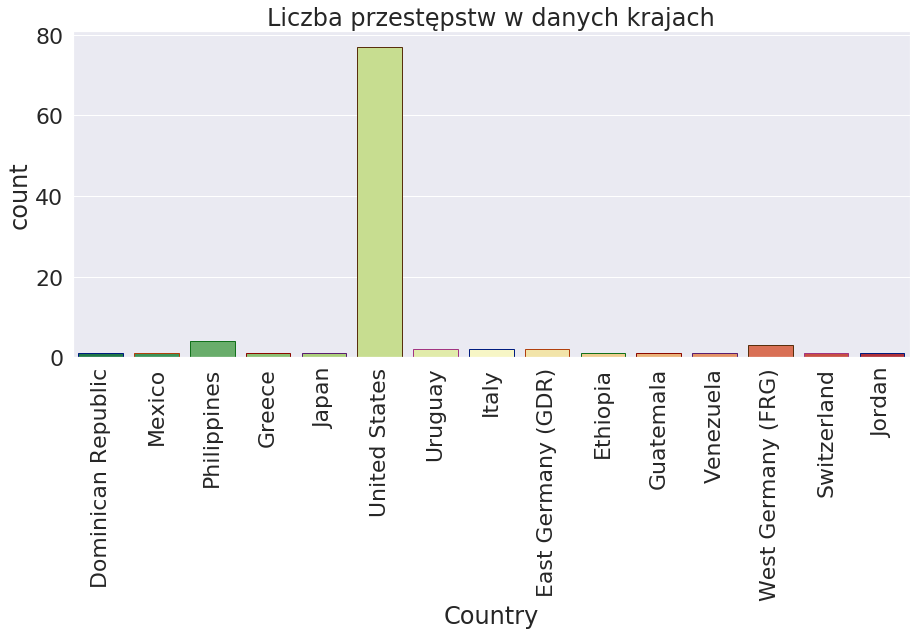

In [189]:
plt.subplots(figsize=(15,6))
sns.countplot('Country',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Liczba przestępstw w danych krajach')
plt.show()

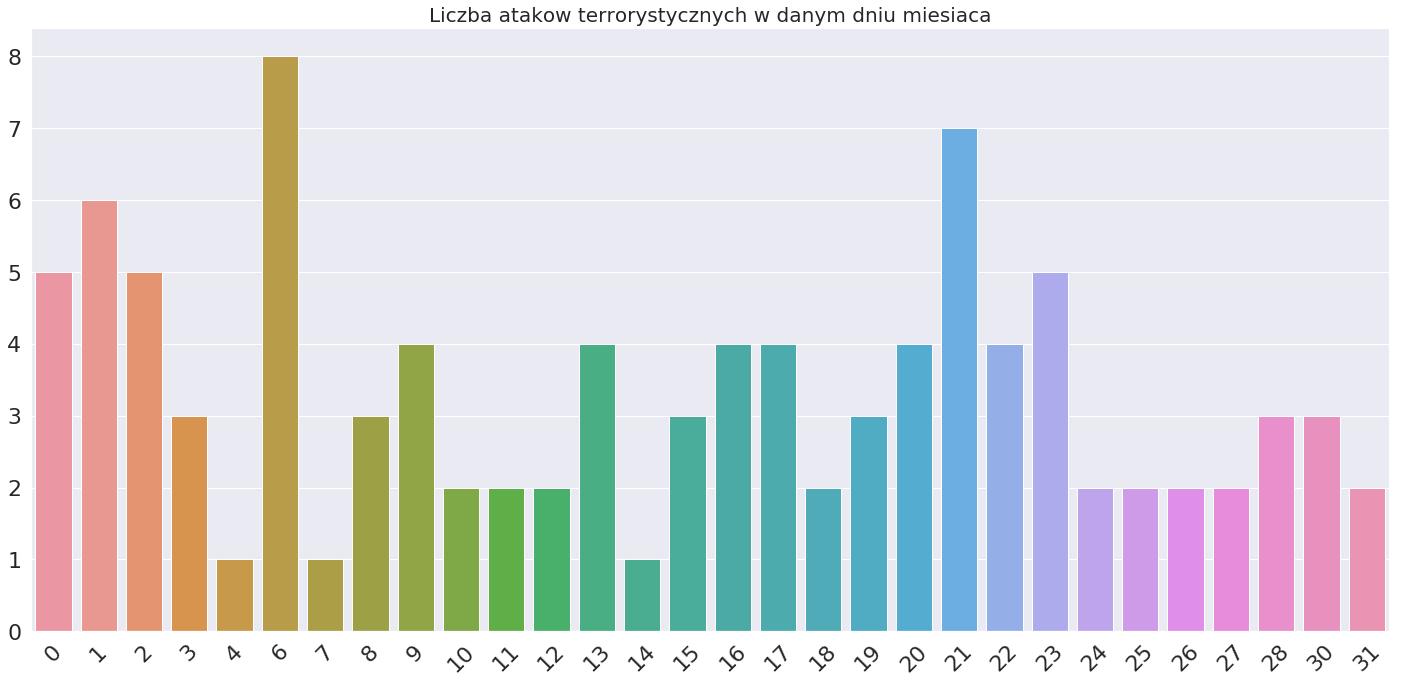

In [190]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(20,10))
sns.countplot('Day',data=data);
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('Liczba atakow terrorystycznych w danym dniu miesiaca', fontsize=20)
plt.tight_layout()

In [191]:
#Jakie bylo top 7 regionow na swiecie z najwieksza liczba przestepstw w 1970 roku?

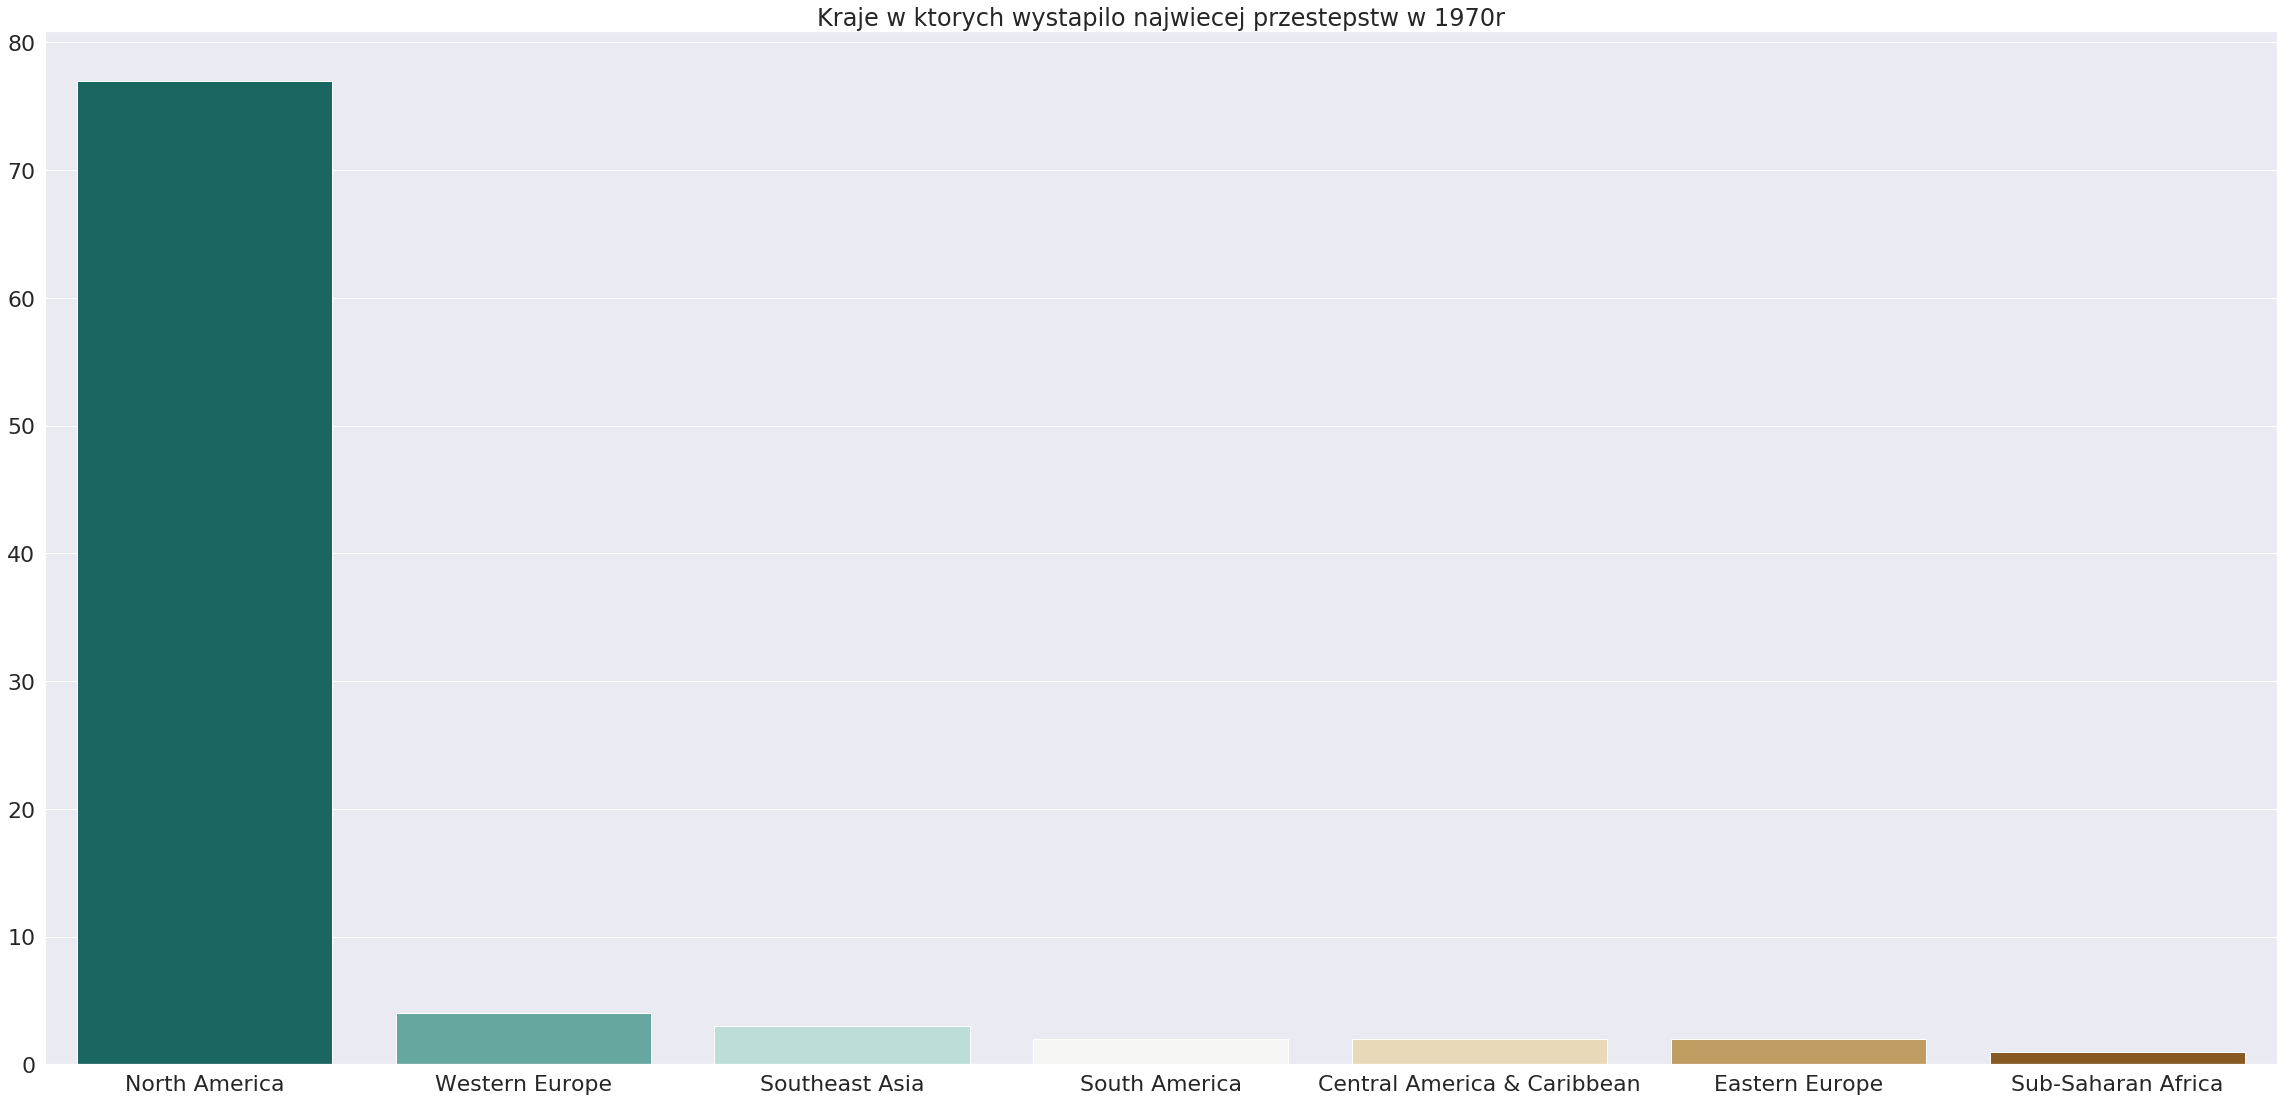

In [192]:
plt.subplots(figsize=(40,19))
sns.barplot(data['Region'].value_counts()[:7].index,data['Country'].value_counts()[:7].values, palette='BrBG_r')
plt.title('Kraje w ktorych wystapilo najwiecej przestepstw w 1970r')
plt.show()

In [181]:
#Jak nazywały sie 5 najbardziej aktywnych grup przestepczych w badanym 1970 roku?

In [182]:
data['Group'].value_counts().head(5)

Unknown                20
Black Nationalists     14
Student Radicals       12
Strikers               10
Left-Wing Militants    10
Name: Group, dtype: int64

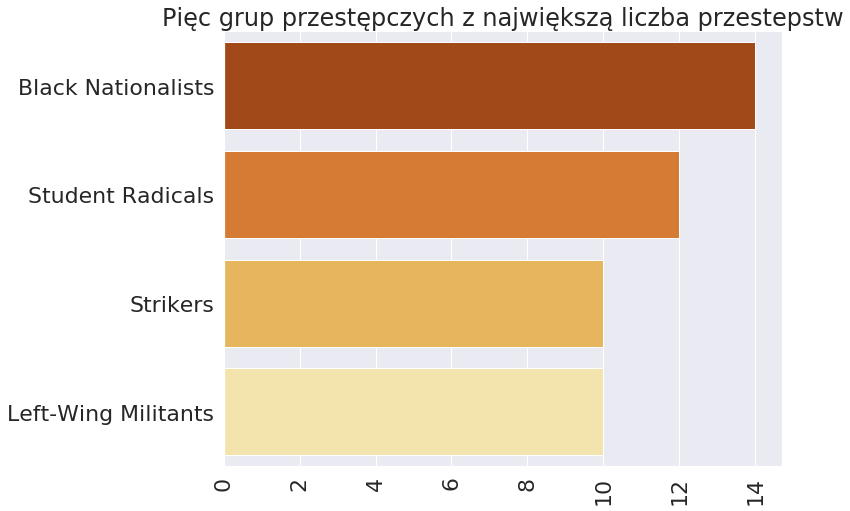

In [173]:
sns.barplot(data['Group'].value_counts()[1:5].values,data['Group'].value_counts()[1:5].index,palette=('YlOrBr_r'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Pięc grup przestępczych z największą liczba przestepstw')
plt.show()

In [183]:
#Ile było ataków terrorystycznych danego typu w konkretnym dniu miesiąca ?

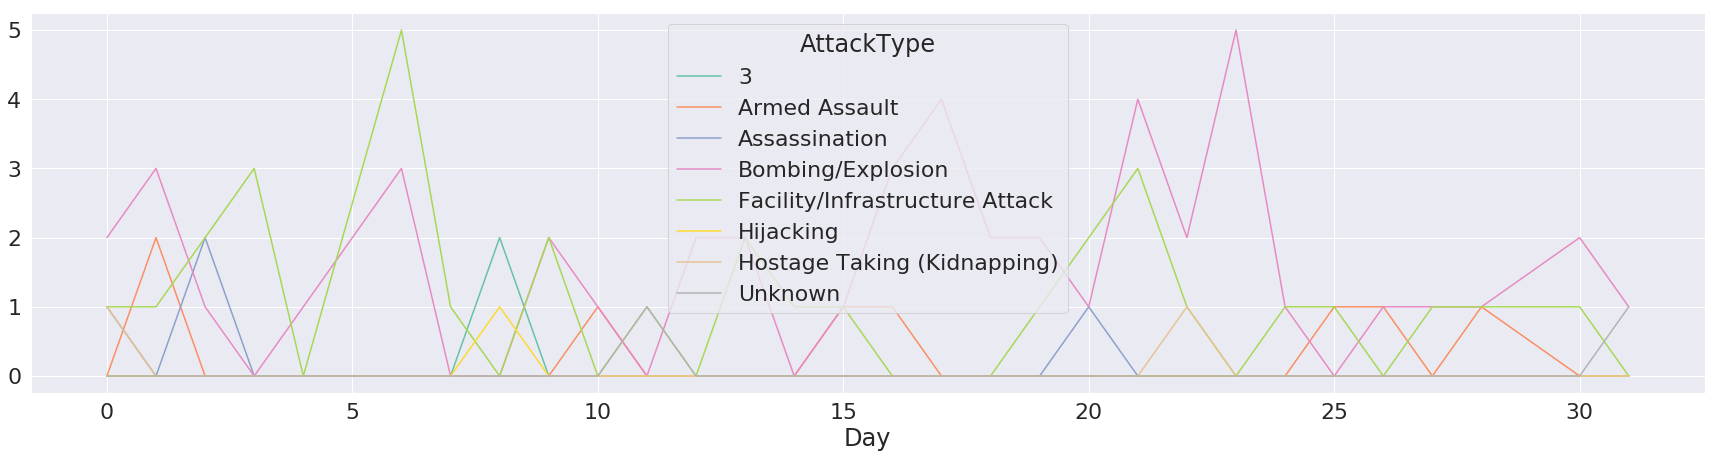

In [184]:
terror_region=pd.crosstab(data.Day,data.AttackType)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(30,7)
plt.show()